# Assignment 2: Recognition using histograms, convolution, and image filtering


## Exercise 1: Global approach to image description

In [3]:
from array import array
from UZ_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
from a2_utils import *
import os
import random

### A)



Firstly, you will implement the function myhist3 that computes a 3-D histogram from a three channel image. <br />
The images you will use are RGB, but the function should also work on other color spaces. The resulting histogram is stored in a 3-D <br />
matrix. The size of the resulting histogram is determined by the parameter n_bins.

In [4]:
def myhist2(I, numofbins):
    I = I.reshape(-1)
    max_v = max(I)
    min_v = min(I)
    interval = (max_v - min_v) / numofbins
    hist = np.zeros(numofbins)
    for i in I:
        if i == max_v:
            hist[-1] += 1
        else:
            hist[int((i - min_v) // interval)] += 1

    return np.array(hist)/sum(hist)
  
def myhist3(image, numofbins):
    hist = np.zeros(numofbins)
    if len(image.shape) == 3:
      H = np.zeros((numofbins, numofbins, numofbins)).astype(np.int64)
      max_v = np.max(image)
      min_v = np.min(image)
      image = image.reshape(-1, 3)
      interval = (max_v - min_v) / numofbins
      counter =0
      for r,g,b in image:
        r_i = int((r - min_v) / interval)
        g_i = int((g - min_v) / interval)
        b_i = int((b - min_v) / interval)
        if r_i == numofbins:
          r_i -= 1
        if g_i == numofbins:
          g_i -= 1
        if b_i == numofbins:
          b_i -= 1
       

        H[r_i, g_i, b_i] += 1
        
      return H/np.sum(H)
    else:
      return myhist2(image, numofbins)

In [5]:
I = imread("images/lena.png")
testhist = myhist3(I, 8)
print(testhist.shape)
print(testhist)

(8, 8, 8)
[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.000

### B)


In order to perform image comparison using histograms, we need to implement some distance measures.  </br>
These are defined for two input histograms and return a single scalar value that represents the similarity (or distance) between the two histograms. </br>
Implement a function compare_histograms that accepts two histograms and a string that identifies the distance measure you wish to calculate. </br>
You can start with the L2 metric. The L2 metric (commonly known as Euclidean distance) </br>
Also implement the following measures that are more suitable for histogram comparison: </br>
* Chi-square distance 
* Intersection 
* Hellinger distance </br>


Try to avoid looping over histogram values and instead use vector operations on entire matrices at once.

In [12]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def chi_square(x, y):
    return 0.5 * np.sum((x - y)**2 / (x + y + 1e-6))

def intersection(x, y):
    return 1 - np.sum(np.minimum(x, y))

def helliger(x, y):
    return np.sqrt((1 / 2) * np.sum(np.square(np.sqrt(x) - np.sqrt(y))))

### C)


Test your function with the following images:

* dataset/object_01_1.png,
* dataset/object_02_1.png,
* dataset/object_03_1.png.

Compute a 8x8x8-bin 3-D histogram for each image. Reshape each of them into a 1-D array. Using plt.subplot(),</br>
display all three images in the same window as wellas their corresponding histograms. </br>
Compute the L2 distance between histograms of object 1 and 2 as well as L2 distance between histograms of objects 1 and 3.</br>

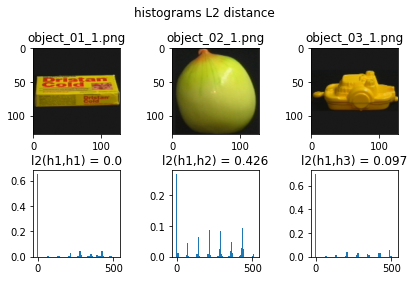

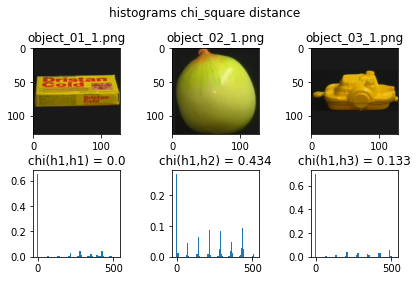

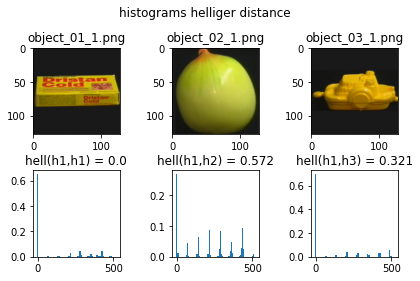

In [13]:
I1 = imread("./dataset/object_01_1.png")
I2 = imread("./dataset/object_02_1.png")
I3 = imread("./dataset/object_03_1.png")
hist1 = myhist3(I1, 8).reshape(-1)
hist2 = myhist3(I2, 8).reshape(-1)
hist3 = myhist3(I3, 8).reshape(-1)

a, two = plt.subplots(2, 3)
a.suptitle("histograms L2 distance")
a.tight_layout(pad=1.5)
two[0, 0].imshow(I1, cmap="gray")
two[0, 0].set(title="object_01_1.png")

two[0, 1].imshow(I2, cmap="gray")
two[0, 1].set(title="object_02_1.png")

two[0, 2].imshow(I3, cmap="gray")
two[0, 2].set(title="object_03_1.png")

two[1, 0].bar(height=hist1, x=range(len(hist1)), width=10)
two[1, 0].set(title="l2(h1,h1) = " + str(round(euclidean_distance(hist1, hist1),3)))

two[1, 1].bar(height=hist2, x=range(len(hist2)), width=10)
two[1, 1].set(title="l2(h1,h2) = " + str(round(euclidean_distance(hist1, hist2),3)))

two[1, 2].bar(height=hist3, x=range(len(hist3)), width=10)
two[1, 2].set(title="l2(h1,h3) = " + str(round(euclidean_distance(hist1, hist3),3)))

plt.show()

a, two = plt.subplots(2, 3)
a.suptitle("histograms chi_square distance")
a.tight_layout(pad=1.5)
two[0, 0].imshow(I1, cmap="gray")
two[0, 0].set(title="object_01_1.png")

two[0, 1].imshow(I2, cmap="gray")
two[0, 1].set(title="object_02_1.png")

two[0, 2].imshow(I3, cmap="gray")
two[0, 2].set(title="object_03_1.png")

two[1, 0].bar(height=hist1, x=range(len(hist1)), width=10)
two[1, 0].set(title="chi(h1,h1) = " + str(round(chi_square(hist1, hist1),3)))

two[1, 1].bar(height=hist2, x=range(len(hist2)), width=10)
two[1, 1].set(title="chi(h1,h2) = " + str(round(chi_square(hist1, hist2),3)))

two[1, 2].bar(height=hist3, x=range(len(hist3)), width=10)
two[1, 2].set(title="chi(h1,h3) = " + str(round(chi_square(hist1, hist3),3)))

plt.show()

a, two = plt.subplots(2, 3)
a.suptitle("histograms helliger distance")
a.tight_layout(pad=1.5)
two[0, 0].imshow(I1, cmap="gray")
two[0, 0].set(title="object_01_1.png")

two[0, 1].imshow(I2, cmap="gray")
two[0, 1].set(title="object_02_1.png")

two[0, 2].imshow(I3, cmap="gray")
two[0, 2].set(title="object_03_1.png")

two[1, 0].bar(height=hist1, x=range(len(hist1)), width=10)
two[1, 0].set(title="hell(h1,h1) = " + str(round(helliger(hist1, hist1),3)))

two[1, 1].bar(height=hist2, x=range(len(hist2)), width=10)
two[1, 1].set(title="hell(h1,h2) = " + str(round(helliger(hist1, hist2),3)))

two[1, 2].bar(height=hist3, x=range(len(hist3)), width=10)
two[1, 2].set(title="hell(h1,h3) = " + str(round(helliger(hist1, hist3),3)))

plt.show()


#### Question
Which image (object_02_1.png or object_03_1.png) is more similar </br>
to image object_01_1.png considering the L2 distance? How about the other three</br>
distances? We can see that all three histograms contain a strongly expressed component</br>
(one bin has a much higher value than the others). Which color does this bin represent?

##### Answer
If we look at l2 distance we will she that the object_03_1.png image is closer to the first one since its l2 distance is lower. </br>
The bin that is the highest is the color black (0,0,0) on the rgb scale. </br>
with other distances we get different number as a result but the closest image is still object_03.


### D)

You will now implement a simple image retrieval system that will use histograms. </br>
Write a function that will accept the path to the image directory and the parameter</br>
n_bins and then calculate RGB histograms for all images in the directory as well as</br>
transform them to 1-D arrays. Store the histograms in an appropriate data structure.</br>
Select some image from the directory `dataset/` and compute the distance between</br>
its histogram and all the other histograms you calculated before. Sort the list according</br>
to the calculated similarity and display the reference image and the first</br>
five most similar images to it. Also display the corresponding histograms. Do this</br>
for all four distance measures that you implemented earlier.</br>

In [15]:
# Could be  fucntion parameters
# its nicer this way in a notebook
##############################
directory = "./dataset/"
numbins = 8
##############################

histograms = dict()
for filename in os.listdir(directory):
  I_temp = imread(directory + filename)
  histograms[filename] = myhist3(I_temp, numbins).reshape(-1)
  
image_name, hist = random.choice(list(histograms.items()))
# image_name = "object_05_4.png"
# hist = histograms[image_name]

l2 = []
hell = []
inter =[]
chi = []

for k,v in histograms.items():
  l2.append((k,euclidean_distance(hist, v)))
  hell.append((k,helliger(hist, v)))
  inter.append((k, intersection(hist, v)))
  chi.append((k, chi_square(hist, v)))

hell_whole = hell.copy()
chi.sort(key=lambda x: x[1])
hell.sort(key=lambda x: x[1])
l2.sort(key=lambda x: x[1])
inter.sort(key=lambda x: x[1])


chi = chi[:6]
hell = hell[:6]
l2 = l2[:6]
inter = inter[:6]

every_distance = [(chi, "chi"), (hell, "hell"), (l2,"l2"), (inter,"inter")]

for i, (distance,name_of_distance) in enumerate(every_distance):
  a, two = plt.subplots(2, 6)
  a.suptitle(name_of_distance)
  
      
  for j, (name, hist) in enumerate(distance):
    two[0,j].imshow(imread(directory + name))
    two[0,j].set(title=name[5:])
    
    two[1,j].bar(height=histograms[name], x=range(len(histograms[name])), width=5)
    two[1,j].set(title=str(hist)[:5])
    
  plt.show()
  


#### Question :
Which distance is in your opinion best suited for image retrieval? How does the retrieved sequence change </br>
if you use a different number of bins? Is the execution time affected by the number of bins? </br>

#### Answer :
the best distance in my opinion has to be helliger distance. (as of my small testing)</br>
the more the bins the more accurate the image we get back </br>
yes the more the bins the slower the program 

### E)

You can get a better sense of the differences in the distance values if you plot all of them at the same time. </br>
 Use the function plt.plot() to display image indices on the x axis and distances to the reference image on the y axis.</br>
 Display both the unsorted and the sorted image sequence and mark the most similar values using a circle (see pyplot documentation).

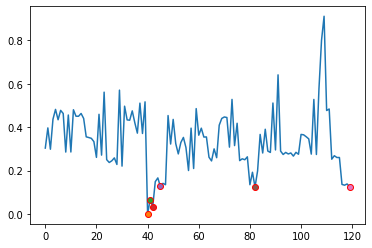

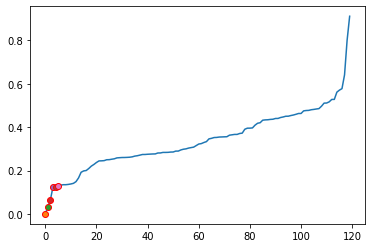

In [ ]:
min_5_hell = [x[1] for x in hell]
plt.plot([x[1] for x in hell_whole])

for i,(_,x) in enumerate(hell_whole):
  if x in min_5_hell:
    plt.plot(i, x, marker="o", markeredgecolor="red")

plt.show()
hell_whole.sort(key=lambda x: x[1])
plt.plot([x[1] for x in hell_whole])

for i,(_,x) in enumerate(hell_whole):
  if x in min_5_hell:
    plt.plot(i, x, marker="o", markeredgecolor="red")

plt.show()

### F)


This simple retrieval system is strongly influenced by dominant colors that carry no discriminative information.</br>
Analyze the presence of different colors by summing up all image histograms bin-wise and displaying the resulting histogram.</br>
Which bins dominate this histogram?</br>

black color bins ()

(8, 8, 8)


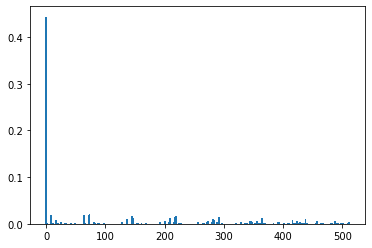

In [ ]:
mega_histogram = np.zeros((numbins, numbins, numbins))

for hist in histograms.values():
  mega_histogram += hist.reshape(numbins, numbins, numbins)
## normalize
mega_histogram = mega_histogram/np.sum(mega_histogram)
print(mega_histogram.shape)
plt.bar(height=mega_histogram.reshape(-1), x=range(len(mega_histogram.reshape(-1))), width=3)
plt.show()


To address this issue, you will implement a simple frequency-based weighting technique, similar to the ones that are employed </br>
 in document retrieval systems. Use the combined frequency histogram you calculated to determine the weight for each bin. </br>
The weights should be lower for bins that are strongly represented in the frequency histogram and vice versa. One way </br>
 of computing this weight is to use exponential function wi = e^-lambdaF(i), where F(i) represents a frequency of </br>
  the i-th bin and lambda is a scaling constant that you have to set. There are also other ways of computing </br>
weights that you can experiment with. Before calculating histogram similarity, you should multiply each histogram  </br>
with the weights vector bin-wise (and normalize the result). Finally, you can compare the retrieval process for the weighted and </br>
the unweighted histograms. Report your observations. Did the weighting help with retrieving relevant results? </br>

#### answer:
i think it should since the differences in images are only in little details (majority, black background) is the same.
although i dont think that it always made a good difference.

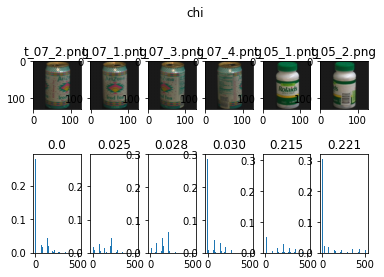

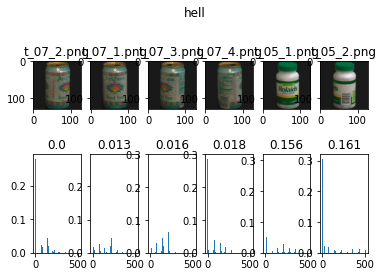

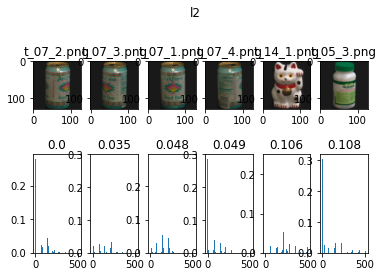

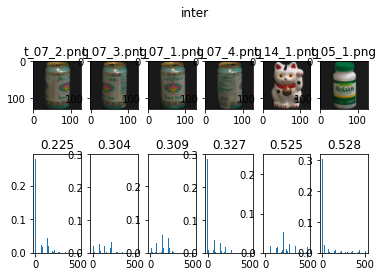

In [ ]:
import math

weights = np.zeros_like(mega_histogram.reshape(-1))

for i, f_i in enumerate(mega_histogram.reshape(-1)):
  weights[i] = math.e ** (-f_i * 1.3)

## repeat D and just multiply histograms by weights
directory = "./dataset/"
numbins = 8

histograms = dict()
for filename in os.listdir(directory):
  I_temp = imread(directory + filename)
  histograms[filename] = myhist3(I_temp, numbins).reshape(-1) * weights
  
image_name, hist = random.choice(list(histograms.items()))

l2 = []
hell = []
inter =[]
chi = []

for k,v in histograms.items():
  l2.append((k,euclidean_distance(hist, v)))
  hell.append((k,helliger(hist, v)))
  inter.append((k, intersection(hist, v)))
  chi.append((k, chi_square(hist, v)))

hell_whole = hell.copy()
chi.sort(key=lambda x: x[1])
hell.sort(key=lambda x: x[1])
l2.sort(key=lambda x: x[1])
inter.sort(key=lambda x: x[1])


chi = chi[:6]
hell = hell[:6]
l2 = l2[:6]
inter = inter[:6]

every_distance = [(chi, "chi"), (hell, "hell"), (l2,"l2"), (inter,"inter")]

for i, (distance,name_of_distance) in enumerate(every_distance):
  a, two = plt.subplots(2, 6)
  a.suptitle(name_of_distance)
  
      
  for j, (name, hist) in enumerate(distance):
    two[0,j].imshow(imread(directory + name))
    two[0,j].set(title=name[5:])
    
    two[1,j].bar(height=histograms[name], x=range(len(histograms[name])), width=5)
    two[1,j].set(title=str(hist)[:5])
    
  plt.show()

## Exercise 2: Convolution

### A)


Compute the convolution between the signal and kernel below (k ? f) by hand.
![image.png](./2a.png)

### B) C)

Implement the function simple_convolution that uses a 1-D signal I and a kernel
k of size 2N + 1. The function should return the convolution between the two.
To simplify, you only need to calculate the convolution on signal elements from
i = N to i = jIj 􀀀 N. The first and last N elements of the signal will not be
used (this is different in practice where signal edges must be accounted for). Test
your implementation by loading the signal (file signal.txt) and the kernel (file
kernal.txt) using the function read_data from a2_utils.py and performing the
operation. Display the signal, the kernel and the result on the same figure. You can
compare your result with the result of function cv2.filter2D. Note that the shape
should be generally identical, while the values at the edges of the results and the
results’ offset might be different since you will not be addressing the issue of the
border pixels.


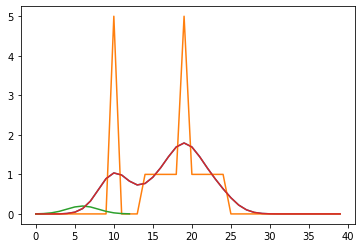

In [ ]:
def simple_convolution(signal, kernel):
  orig_len = len(signal)
  assert len(kernel) % 2 == 1, "kernel must be odd"
  n = (len(kernel) - 1) // 2
  kernel = np.flip(kernel)
  signal = np.pad(signal, n, mode="edge")
  output = np.zeros_like(signal)
  for i in range(n,len(signal) - n - 1):
    output[i] = np.sum(signal[i-n:i+n+1] * kernel)
  output = output[n:-n] 
  assert len(output) == orig_len
  return output

ker = read_data("./kernel.txt")
sign = read_data("./signal.txt")

teset = simple_convolution(sign, ker)

plt.plot(teset)
plt.plot(sign)
plt.plot(ker)
plt.plot(cv2.filter2D(sign, -1, ker))
plt.show()
## show that it overlaps


### D)

Write a function that calculates a Gaussian kernel. The input to the function should be parameter sigma,</br>
 which defines the shape of the kernel. Because the values beyond 3sigma are very small, we usually limit the kernel size </br>
to 2 * 3sigma + 1. Don’t forget to normalize the kernel. Generate kernels for different </br>
values of sigma = 0:5; 1; 2; 3; 4 and display them on the same figure (aligned).

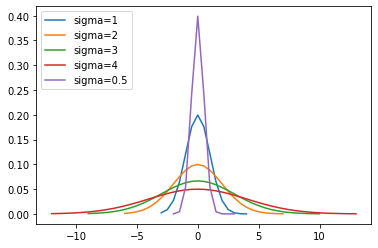

In [ ]:
def gauss_kernel(sigma):
  sigma3 = np.ceil(3*sigma).astype(int)
  kernel = np.arange(-sigma3, sigma3+1.5,0.5)
  for i,x in enumerate(kernel):
    kernel[i] = np.exp(-x**2/(2*sigma**2))
  return kernel/np.sum(kernel)

ker1 = gauss_kernel(1)
ker2 = gauss_kernel(2)
ker3 = gauss_kernel(3)
ker4 = gauss_kernel(4)
ker05 = gauss_kernel(0.5)


plt.plot(np.arange(-3,4.5,0.5),ker1, label="sigma=1")
plt.plot(np.arange(-6,7.5,0.5),ker2, label="sigma=2") 
plt.plot(np.arange(-9,10.5,0.5),ker3, label="sigma=3") 
plt.plot(np.arange(-12,13.5,0.5),ker4,label="sigma=4")
plt.plot(np.arange(-2,3.5,0.5),ker05,label="sigma=0.5")
plt.legend(loc="upper left")
plt.show()

#### Question:
The figure below shows two kernels (a) and (b) as well as signal (c). </br>
Sketch (do not focus on exact proportions of your drawing but rather on the understanding </br>
of what you are doing) the resulting convolved signal of the given input signal and each kernel.</br>

#### Answer:
!["nevem"](2d.png)


### E)

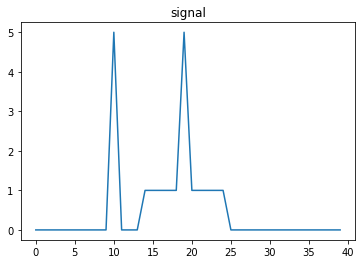

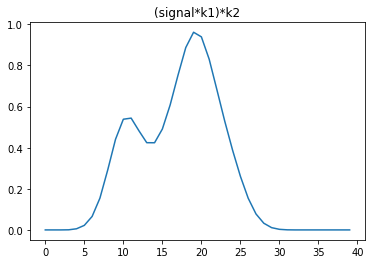

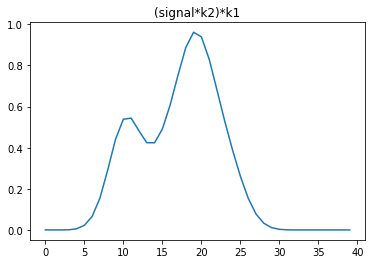

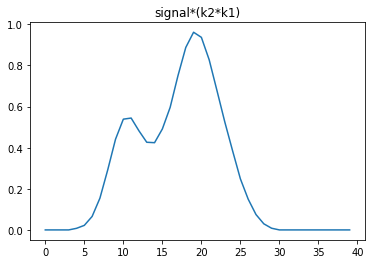

In [ ]:
signal = read_data("./signal.txt")

k1 = gauss_kernel(2)
k1 = k1[:-1:2]
k2 =np.array([0.1,0.6,0.4])
k3 = simple_convolution(k1,k2)

s1 = simple_convolution(signal, k1)
s1 = simple_convolution(s1, k2)

s2 = simple_convolution(signal, k2)
s2 = simple_convolution(s2, k1)

s3 = simple_convolution(signal, k3)

plt.plot(signal)
plt.title("signal")
plt.show()
plt.plot(s1)
plt.title("(signal*k1)*k2")
plt.show()
plt.plot(s2)
plt.title("(signal*k2)*k1")
plt.show()
plt.plot(s3)
plt.title("signal*(k2*k1)")
plt.show()

## Exercise 3: Image filtering

### A)

Write a function `gaussfilter` that generates a Gaussian filter and applies it to a 2-D image.  </br>
You can use the function cv2.filter2D() to perform the convolution using the desired kernel. </br>
Generate a 1-D Gaussian kernel and first use it to filter the image along the first dimension, </br>
then convolve the result using the same kernel,but transposed.

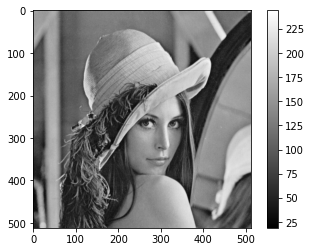

gauss noise


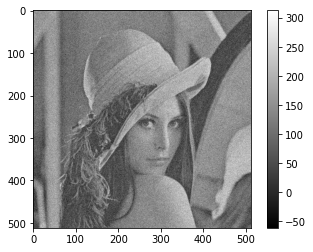

salt and pepper noise


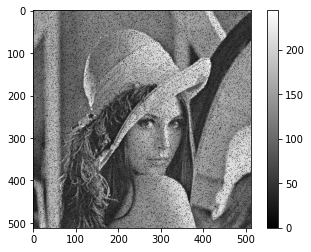

gauss noise, after filter


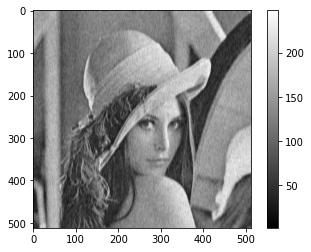

salt and pepper noise, after filter


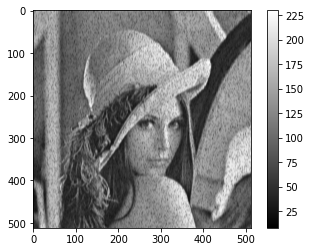

In [ ]:
image = cv2.imread("./images/lena.png", cv2.IMREAD_GRAYSCALE)
imshow(image)

image1 = gauss_noise(image/255, 0.1)*255
print("gauss noise")
imshow(image1)
image2 = sp_noise(image, 0.1)
print("salt and pepper noise")
imshow(image2)

gaus = gauss_kernel(0.7)

image1 = cv2.filter2D(image1, -1, gaus)
image1 = cv2.filter2D(image1, -1, gaus.T)

image2 = cv2.filter2D(image2,-1, gaus)
image2 = cv2.filter2D(image2, -1, gaus.T)

# image = cv2.filter2D(image, -1, gaus)
# image = cv2.filter2D(image, -1, gaus.T)
# imshow(image)
print("gauss noise, after filter")
imshow(image1.reshape(512,-1))

print("salt and pepper noise, after filter")
imshow(image2.reshape(512,-1))

#### Question:
Which noise is better removed using the Gaussian filter?

#### Answer:
the gaussian noise. The high freq in salt and peper "confusse" the gausian filter. Better for median filter

### B)

Convolution can also be used for image sharpening. Look at its definition in the
lecture slides and implement it. Test it on the image from file museum.jpg.


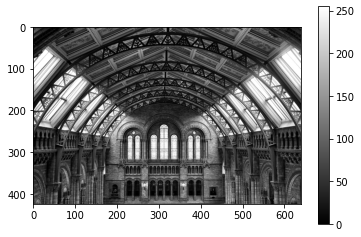

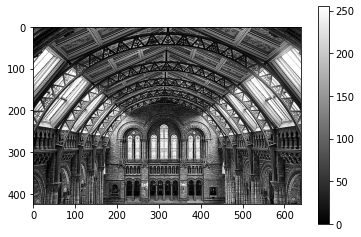

In [ ]:
image = cv2.imread("./images/museum.jpg", cv2.IMREAD_GRAYSCALE)
imshow(image)
kernel = np.array([[0,0,0],[0,2,0],[0,0,0]]) - np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

image = cv2.filter2D(image, -1, kernel)
image = cv2.filter2D(image, -1, kernel)
# image = cv2.filter2D(image, -1, kernel.T)
# image = cv2.filter2D(image, -1, kernel.T)
# image = cv2.filter2D(image, -1, kernel.T)

imshow(image)

### C)


Implement a nonlinear median filter. While a Gaussian filter locally computes a weighted average, </br>
the median filter sorts the signal values in the given filter window and uses the median value of the </br>
 sorted sequence as the result. Implement a simplemedian filter as a function simple_median that takes the </br>
  input signal I and thefilter width w and returns the filtered signal. </br>
Create a 1-D signal corrupted with salt and pepper noise and filter it using simple_median.  </br>
Display the result using different window sizes. Also try to remove thenoise using the Gaussian filter. What does the result look like and why? </br>

* the gaussin filter manages to reduce and `average` the values so the salt and pepper noise is much lower but it cannot remove it since it reacts to it (let say that their built is simmilar)

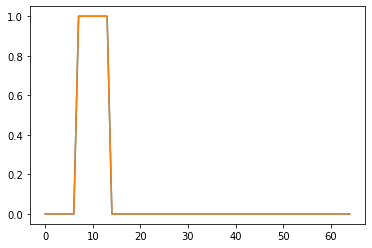

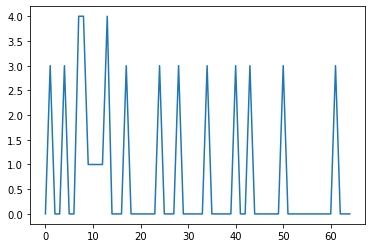

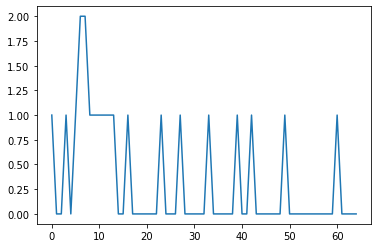

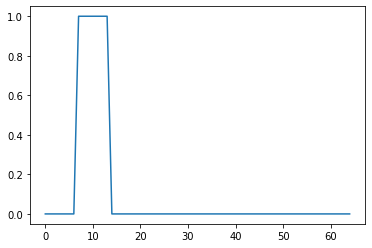

In [ ]:
def simple_median(signal,kernel_length):
  signal = np.pad(signal, kernel_length//2 + 1, mode="edge")
  for i in range(kernel_length//2 + 1, len(signal) - kernel_length//2 - 1):
    signal[i] = np.median(signal[i-kernel_length//2:i+kernel_length//2+1])
  return signal[kernel_length//2 + 1:-kernel_length//2 - 1]


test_signal = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.plot(test_signal)

test_signal_salt = test_signal + np.array([0,3,0,0,3,0,0,3,3,0,0,0,0,3,0,0,0,3,0,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,0])

plt.plot(test_signal)
plt.show()
plt.plot(test_signal_salt)
plt.show()

# end2 = cv2.filter2D(test_signal_salt.reshape(1,-1), -1, gauss_kernel(1))
end2 = simple_convolution(test_signal_salt, gauss_kernel(0.5))
plt.plot(end2)
plt.show()
end = simple_median(test_signal_salt, 4)
# if we put 3 it doesnt filter out all the salt and pepper noise
# makes sense
plt.plot(end)
plt.show()

#### Question:
Which filter performs better at this specific task? In comparison to Gaussian filter that can be applied multiple times in any order, </br>
does the order matter in case of median filter? What is the name of filters like this?

#### Answer:
the one that is desinged for the task??
* SP - median
* gaus noise - gausian </br>
yes the order is important </br>
non-linear filter

### D)*


Implement a 2-D version of the median filter. Test it on an image that was corrupted by Gaussian noise</br>
and on an image that was corrupted by salt and pepper noise. Compare the results with the Gaussian</br>
filter for multiple noise intensities and filter sizes.

In [ ]:
def simple_median(signal,kernel_length):
  signal = np.pad(signal, kernel_length//2 + 1, mode="edge")
  for i in range(kernel_length//2 + 1, len(signal) - kernel_length//2 - 1):
    signal[i] = np.median(signal[i-kernel_length//2:i+kernel_length//2+1])
  return signal[kernel_length//2 + 1:-kernel_length//2 - 1]

def twod_median(image, kernel_size):
  image = np.pad(image, kernel_size//2 + 1, mode="edge")
  # walk thorugh the image
  for i in range(kernel_size//2 + 1, len(image) - kernel_size//2 - 1):
    for j in range(kernel_size//2 + 1, len(image[0]) - kernel_size//2 - 1):
      image[i][j] = np.median(image[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1])
  return image[kernel_size//2 + 1:-kernel_size//2 - 1, kernel_size//2 + 1:-kernel_size//2 - 1]


original


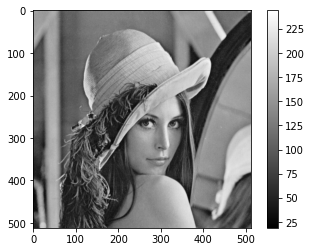

salt and pepper noise


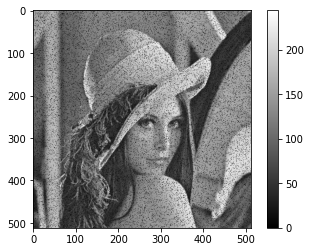

salt and pepper noise, after median filter


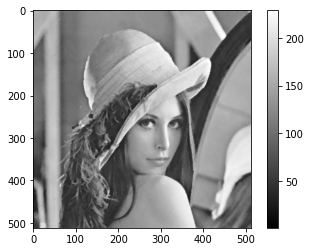

salt and pepper noise, after gaussian filter


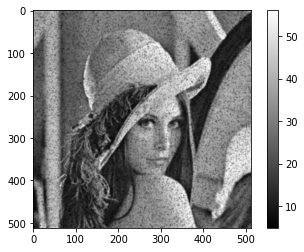

original


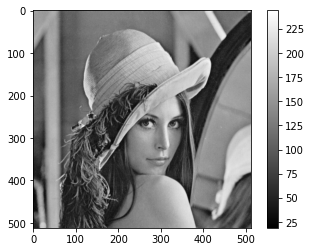

gauss noise, after median filter


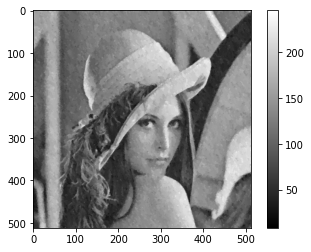

gausian noise, after gaussian filter


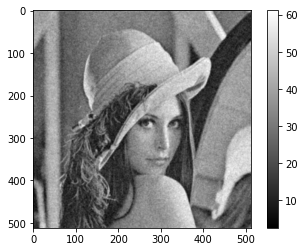

In [ ]:

## test the filters on SP noise
image = cv2.imread("./images/lena.png", cv2.IMREAD_GRAYSCALE)
print("original")
imshow(image)
image = sp_noise(image, 0.1)
print("salt and pepper noise")
imshow(image)
test = twod_median(image, 2)
print("salt and pepper noise, after median filter")
imshow(test)

gaus = gauss_kernel(1)[:-1:2]
# gaus cannot remove the SP noise effectivly
test = image.copy()
test = cv2.filter2D(test, -1, gaus)
test = test.T
test = cv2.filter2D(test, -1, gaus)
test = test.T
print("salt and pepper noise, after gaussian filter")
imshow(test)


## test the filters on gauss noise

image = cv2.imread("./images/lena.png", cv2.IMREAD_GRAYSCALE)
print("original")
imshow(image)
image = gauss_noise(image/255, 0.1)*255

test = twod_median(image, 2)
print("gauss noise, after median filter")
imshow(test)

gaus = gauss_kernel(1)[:-1:2]
# gaus cannot remove the SP noise effectivly
test = image.copy()
test = cv2.filter2D(test, -1, gaus)
test = test.T
test = cv2.filter2D(test, -1, gaus)
test = test.T
print("gausian noise, after gaussian filter")
imshow(test)

#### Question:
What is the computational complexity of the Gaussian filter operation? </br>
How about the median filter? What does it depend on? Describe the computational </br>
complexity using the O notation (you can assume n log n complexity for sorting).

#### Answer:
* gauss - O(h * w * k), hight, width (image), kernel (1d kernel twice transposed) O(n) = O(2n)
* median- O(h * w * k^2 * log(w^2)) height, widht, kernel size, kernel size to order -> retriving median is O(1)


### E)


Implement the hybrid image merging that was presented at the lectures. To do this you will have to implement </br>
the Laplacian filter. Filter the images (one with the Gaussian and one with the Laplacian filter)</br>
and merge them together (regular or weighted average). You can use images `lincoln.jpg` and `obama.jpg`.</br>
Hint: To get good results, experiment with different kernel sizes for each operation and different weights when merging images.</br>

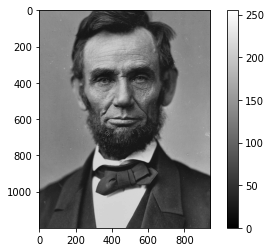

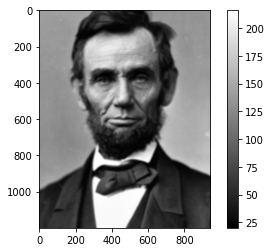

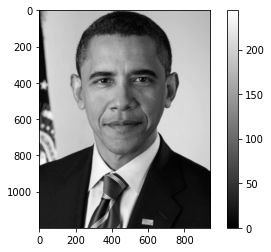

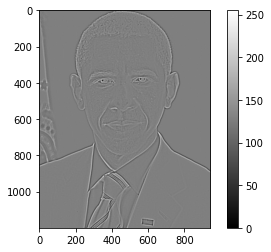

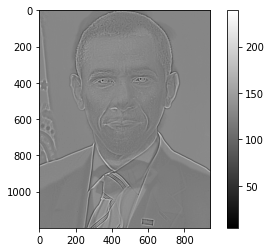

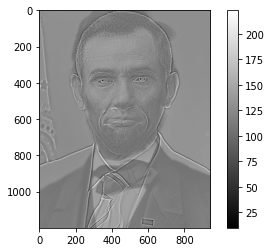

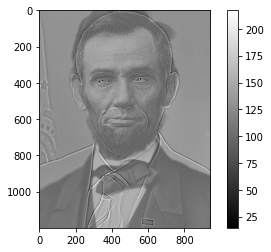

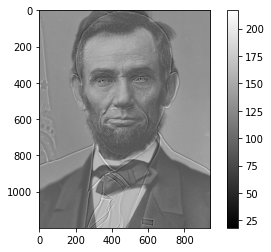

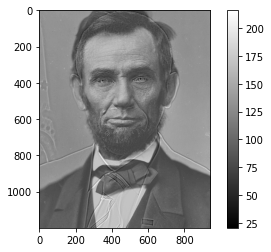

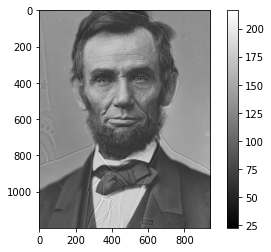

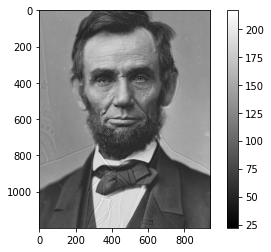

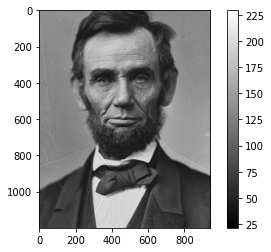

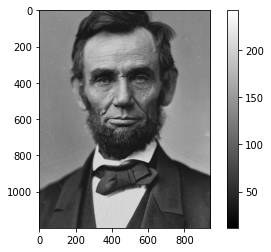

In [ ]:
lincoln = cv2.imread("./images/lincoln.jpg",cv2.IMREAD_GRAYSCALE)

imshow(lincoln)

lincolnblur = cv2.GaussianBlur(lincoln, (15,15), cv2.BORDER_DEFAULT)
imshow(lincolnblur)

## apply the laplace filter to obama

obama = cv2.imread("./images/obama.jpg",cv2.IMREAD_GRAYSCALE)
imshow(obama)
obama = cv2.Laplacian(obama, cv2.CV_64F, ksize=19)
obama = obama / np.max(obama)

obama2 = np.array((obama * 255 + 255)/2).astype(np.uint8)

imshow(obama2)
imshow(0.1 * lincoln + 0.9 * obama2)
imshow(0.2 * lincoln + 0.8 * obama2)
imshow(0.3 * lincoln + 0.7 * obama2)
imshow(0.4 * lincoln + 0.6 * obama2)
imshow(0.5 * lincoln + 0.5 * obama2)
imshow(0.6 * lincoln + 0.4 * obama2)
imshow(0.7 * lincoln + 0.3 * obama2)
imshow(0.8 * lincoln + 0.2 * obama2)
imshow(0.9 * lincoln + 0.1 * obama2)


